In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import datetime
import xlrd
import warnings
warnings.simplefilter('ignore')

## Data Processing

In [2]:
# relevant data frames
df1=pd.read_csv('cabdataset/Cab_Data.csv')
df2=pd.read_csv('cabdataset/City.csv')
df3=pd.read_csv('cabdataset/Customer_ID.csv')
df4=pd.read_csv('cabdataset/Transaction_ID.csv')

In [3]:
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
df1.describe() # quantile + descriptive stats 

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [5]:
# categorical data
df1.City.value_counts() # NY is the mode
df1.Company.value_counts()
df1.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

In [6]:
df2.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
df3.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
df4.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [9]:
# convert date into date-time format
def exceltodatetime(date):
    datetime_date=xlrd.xldate_as_datetime(date,0)
    date_object=datetime_date.date()
#     string_date=date_object.isoformat()
#     return string_date
    return date_object


df1['Profit']=df1['Price Charged']-df1['Cost of Trip']
df1.drop(labels=['Price Charged', 'Cost of Trip'],axis=1, inplace=True)
df1['Date of Travel']=df1['Date of Travel'].apply(lambda x: exceltodatetime(x))
df1['Date of Travel']=pd.to_datetime(df1['Date of Travel'], errors='coerce')
df1['Quarter']=df1['Date of Travel'].dt.quarter
df1['Month']=df1['Date of Travel'].dt.month
df1['Year']=df1['Date of Travel'].dt.year
df1['Day']=df1['Date of Travel'].dt.day
df1['Day of Week']=df1['Date of Travel'].dt.dayofweek

In [10]:
# check for NaN values in pandas dataframe
df1.isnull().values.any() # False
df2.isnull().values.any() # False
df3.isnull().values.any() # False
df4.isnull().values.any() # False

False

In [11]:
# check for duplicate rows
df1.duplicated().any() # False
df1.duplicated().any() # False
df1.duplicated().any() # False
df1.duplicated().any() # False

False

## Profit Analysis

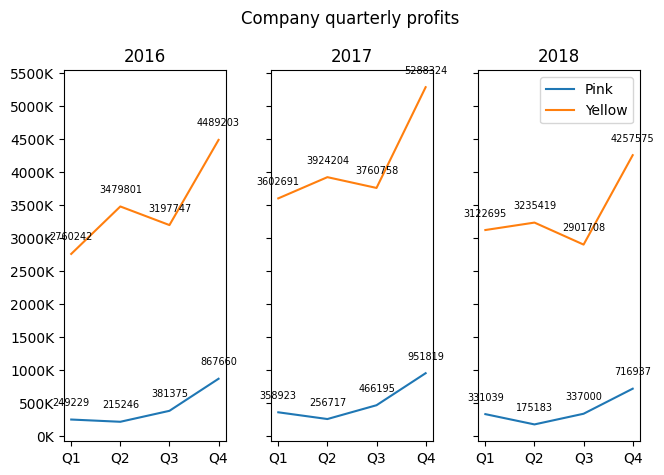

In [12]:
# compare quarterly profit seasonality
quarterlyprofits=df1.groupby(['Company','Year', 'Quarter']).Profit.sum()
quarterlyprofits.index
years=['2016','2017','2018']
quarters=['Q1','Q2','Q3','Q4']
ytick_labels=[f'{i}K' for i in range(0,6000, 500)]

counter=0

fig, ax = plt.subplots(1,3, sharey=True)
for year in years:
    # pink cab quarterly profits
    pinkquarterlyprofits_year=quarterlyprofits.filter(like='Pink Cab').filter(like=year)

    # yellow cab quarterly profits
    yellowquarterlyprofits_year=quarterlyprofits.filter(like='Yellow Cab').filter(like=year)
    
    ax[counter].plot(quarters, pinkquarterlyprofits_year)
    ax[counter].plot(quarters, yellowquarterlyprofits_year)
    ax[counter].set_title(year)

    for x, y in zip(quarters, pinkquarterlyprofits_year):
        label=int(y)
        ax[counter].annotate(label, (x, y),
                 xycoords="data",
                 textcoords="offset points",
                 xytext=(0, 10), ha="center", size=7)
        
    for x, y in zip(quarters, yellowquarterlyprofits_year):
        label=int(y) 
        ax[counter].annotate(label, (x, y),
                 xycoords="data",
                 textcoords="offset points",
                 xytext=(0, 10), ha="center", size=7)
        
    counter+=1
    
    
fig.suptitle('Company quarterly profits')

# form legend
line1 = mlines.Line2D([], [], color='#1f77b4', ls='-', label='Pink')
line2 = mlines.Line2D([], [], color='#ff7f0e', ls='-', label='Yellow')

plt.legend(handles=[line1, line2], fancybox=True)
fig.tight_layout()
ax[0].set_yticks(np.linspace(0,5.5e6,12), ytick_labels )
plt.show()

__Yellow cab consistently achieved higher profits at each quarter across the two year span__

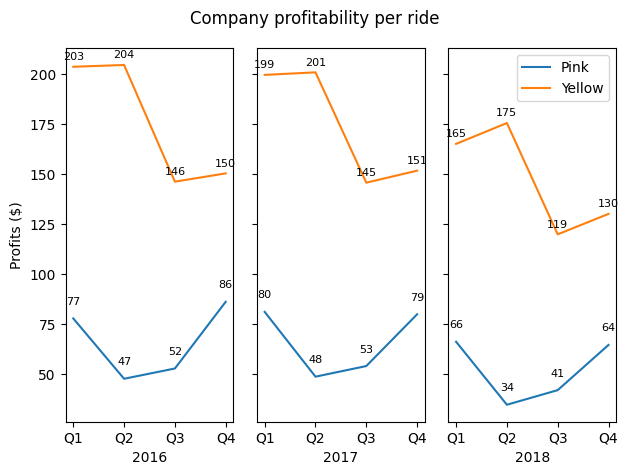

In [13]:
# compare seasonality in no. of rides
# each transaction is a single ride
quarterlyrides=df1.groupby(['Company','Year', 'Quarter'])['Transaction ID'].count()
counter=0
fig, ax = plt.subplots(1,3, sharey=True)

for year in years:
    # pink cab profits per ride
    pinkquarterlyrides_year=quarterlyrides.filter(like='Pink Cab').filter(like=year)
    pinkquarterlyprofits_year=quarterlyprofits.filter(like='Pink Cab').filter(like=year)
    pinkprofitsperride_year=pinkquarterlyprofits_year/pinkquarterlyrides_year

    # yellow cab profits per ride
    yellowquarterlyrides_year=quarterlyrides.filter(like='Yellow Cab').filter(like=year)
    yellowquarterlyprofits_year=quarterlyprofits.filter(like='Yellow Cab').filter(like=year)
    yellowprofitsperride_year=yellowquarterlyprofits_year/yellowquarterlyrides_year

    ax[counter].plot(['Q1','Q2','Q3','Q4'], pinkprofitsperride_year, label='Pink Cab')
    ax[counter].plot(['Q1','Q2','Q3','Q4'], yellowprofitsperride_year, label='Yellow Cab')
    ax[counter].set_xlabel(year)
    
    
    for x, y in zip(quarters, pinkprofitsperride_year):
        label=int(y)
        ax[counter].annotate(label, (x, y),
                 xycoords="data",
                 textcoords="offset points",
                 xytext=(0, 10), ha="center", size=8)
        
    for x, y in zip(quarters, yellowprofitsperride_year):
        label=int(y) 
        ax[counter].annotate(label, (x, y),
                 xycoords="data",
                 textcoords="offset points",
                 xytext=(0, 5), ha="center", size=8)

    counter+=1
    
# form legend
line1 = mlines.Line2D([], [], color='#1f77b4', ls='-', label='Pink')
line2 = mlines.Line2D([], [], color='#ff7f0e', ls='-', label='Yellow')

plt.legend(handles=[line1, line2], fancybox=True)
fig.suptitle('Company profitability per ride')
ax[0].set_ylabel('Profits ($)')
plt.tight_layout()
plt.show()

__Profitability per ride was looked at to uncover if investing in the Pink Cab would be better after scaling the company to service more rides/customers (assuming operations were to remain as efficient). However the Yellow Cab consistently has a much higher profit per ride, also.__

### Average profitability per KM

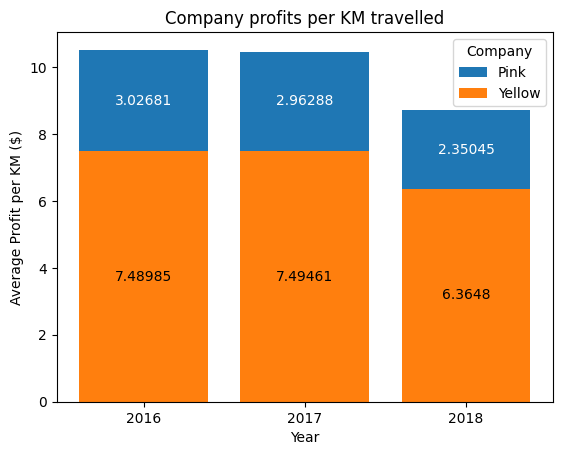

In [14]:
# profit per km
df1['Profit per KM']=df1['Profit']/df1['KM Travelled']
average_profit_per_km=df1.groupby(['Company','Year'])['Profit per KM'].mean()

years=['2016','2017','2018']
average_profit_per_km_pink=average_profit_per_km[0:3]
average_profit_per_km_yellow=average_profit_per_km[3:6]

pink=plt.bar(['2016','2017','2018'], average_profit_per_km_pink, bottom=average_profit_per_km_yellow, label='Pink')
yellow=plt.bar(['2016','2017','2018'], average_profit_per_km_yellow, label='Yellow')
plt.bar_label(pink, label_type='center', color='w')
plt.bar_label(yellow, label_type='center')

plt.ylabel('Average Profit per KM ($)')
plt.xlabel('Year')
plt.title('Company profits per KM travelled')
plt.legend(title='Company')
plt.show()

In [15]:
x=(7.49-3.02)/3.02 + (7.49-2.96)/2.96 + (6.36-2.35)/2.35
x=x/3
x*100

157.23069448199786

__Yellow excels according to this metric also, averaging 157% higher profitability per KM more over the three year span__

## Customer Base Profit Analysis

In [16]:
ch=pd.merge(df3, df4, on=['Customer ID'])
customers=pd.merge(df1, ch, on=['Transaction ID'])
# each transaction with corresponding customers + customer data

In [17]:
customers=customers.loc[:, ['Company', 'Gender', 'Age', 'Income (USD/Month)', 'Year', 'Profit']]

### Profitability by gender

In [18]:
# genderwise contribution in profit
profits_by_gender=customers.groupby(['Company', 'Gender', 'Year'])['Profit'].sum()

pink_profits_by_gender=profits_by_gender.filter(like='Pink Cab')
yellow_profits_by_gender=profits_by_gender.filter(like='Yellow Cab')

# company profits by gender
pink_female_profits=pink_profits_by_gender[0:3]
pink_male_profits=pink_profits_by_gender[3:6]
yellow_female_profits=yellow_profits_by_gender[0:3]
yellow_male_profits=yellow_profits_by_gender[3:6]

# convert to percentages
total=np.array(pink_female_profits)+np.array(pink_male_profits)
pink_female_percentage=pink_female_profits/total*100
pink_male_percentage=pink_male_profits/total*100

total=np.array(yellow_female_profits)+np.array(yellow_male_profits)
yellow_female_percentage=yellow_female_profits/total*100
yellow_male_percentage=yellow_male_profits/total*100

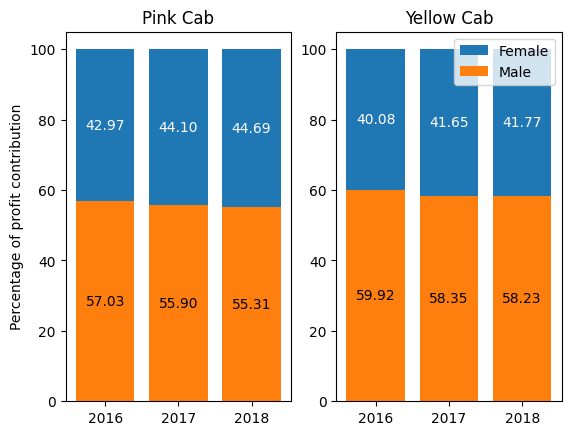

In [19]:
years=['2016','2017','2018']

fig, ax = plt.subplots(1,2)

# pink female profits
pink_female=ax[0].bar(years, pink_female_percentage, bottom=pink_male_percentage, label='Female')
pink_male=ax[0].bar(years, pink_male_percentage, label='Male')

ax[0].bar_label(pink_female,label_type='center', color='w', fmt='%.2f')
ax[0].bar_label(pink_male,label_type='center', fmt='%.2f')
ax[0].set_title('Pink Cab')

# yellow female profits
yellow_female=ax[1].bar(years, yellow_female_percentage, bottom=yellow_male_percentage, label='Female')
yellow_male=ax[1].bar(years, yellow_male_percentage, label='Male')

ax[1].bar_label(yellow_female,label_type='center', color='w', fmt='%.2f')
ax[1].bar_label(yellow_male,label_type='center', fmt='%.2f')
ax[1].set_title('Yellow Cab')

ax[0].set_ylabel('Percentage of profit contribution')
plt.legend()
plt.show()

__They perform similarly in this regard with almost identical distributions of profit across the gender customer base for both cab companies.__

### Profitability by age group

In [20]:
teens=customers.query('18<= Age <= 25')
young_adults=customers.query('26<= Age <=40')
mid_adults=customers.query('41<= Age <=60')
grown_adults=customers.query('Age > 60')

In [21]:
# total profit by agegroup
teen_profits=teens.groupby(['Year', 'Company'])['Profit'].sum()
young_adults_profits=young_adults.groupby(['Year', 'Company'])['Profit'].sum()
mid_adults_profits=mid_adults.groupby(['Year', 'Company'])['Profit'].sum()
grown_adults_profits=grown_adults.groupby(['Year', 'Company'])['Profit'].sum()

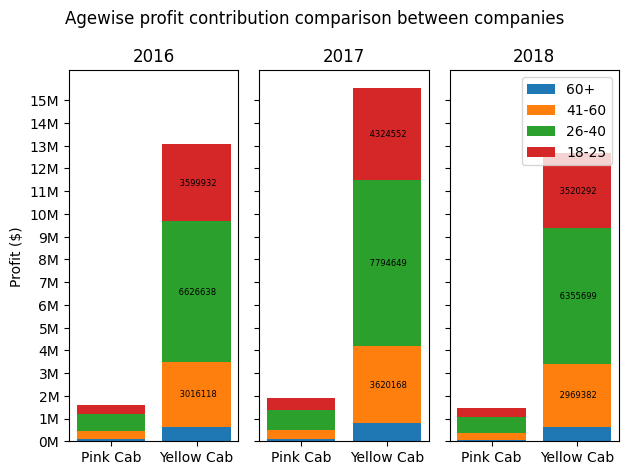

In [34]:
fig, ax = plt.subplots(1,3, sharey=True)
labels=['Pink Cab', 'Yellow Cab']
years=['2016','2017','2018']
counter=0
ytick_labels=[f'{i}M' for i in range(16)]

for year in years:
    grown_profits_year=grown_adults_profits.filter(like=year)
    mid_profits_year=mid_adults_profits.filter(like=year)
    young_profits_year=young_adults_profits.filter(like=year)
    teen_profits_year=teen_profits.filter(like=year)

    grown_adults_year=ax[counter].bar(labels, grown_profits_year, label='60+')
    mid_adults_year=ax[counter].bar(labels, mid_profits_year, bottom=grown_profits_year, label='41-60')
    young_adults_year=ax[counter].bar(labels, young_profits_year, bottom=grown_profits_year+mid_profits_year, label='26-40')
    teens_year=ax[counter].bar(labels, teen_profits_year, bottom=grown_profits_year+mid_profits_year+young_profits_year, label='18-25')
    
    ax[counter].set_title(year)
    counter+=1

# ignore labels for small values
for i in range(3):
    for c in ax[i].containers:
        labels = [f'{v.get_height(): .0f}' if v.get_height() > 1e6 else '' for v in c]
        ax[i].bar_label(c, labels=labels, label_type='center', fmt='%.2f', size=6)
    
fig.suptitle('Agewise profit contribution comparison between companies')
ax[0].set_yticks(np.linspace(0,16e6,16), ytick_labels)
ax[0].set_ylabel('Profit ($)')
plt.plot()
plt.tight_layout()
plt.legend()
plt.show()

__Yellow cab performs slightly better here serving more elderly people (60+ category) but they offer comparable proportions to other age groups.__

### Profitability by Income Class

In [23]:
lower_class=customers.query('`Income (USD/Month)` < 2500')
middle_class=customers.query('2500 <= `Income (USD/Month)` <=15000')
upper_class=customers.query('15000< `Income (USD/Month)`')

In [24]:
lower_class_profits=lower_class.groupby(['Year', 'Company'])['Profit'].sum()
middle_class_profits=middle_class.groupby(['Year', 'Company'])['Profit'].sum()
upper_class_profits=upper_class.groupby(['Year', 'Company'])['Profit'].sum()

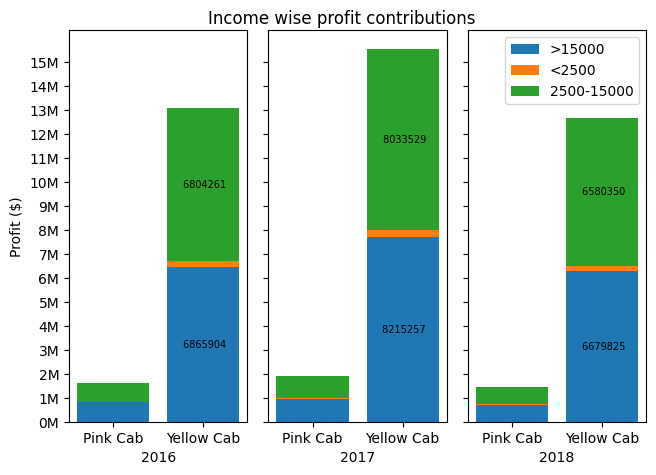

In [33]:
fig, ax = plt.subplots(1,3, sharey=True)
labels=['Pink Cab', 'Yellow Cab']
years=['2016','2017','2018']
counter=0
for year in years:
    lower_class_profits_year=lower_class_profits.filter(like=year)
    middle_class_profits_year=middle_class_profits.filter(like=year)
    upper_class_profits_year=upper_class_profits.filter(like=year)
    
    upper_class_year=ax[counter].bar(labels, upper_class_profits_year, label='>15000')
    low_class_year=ax[counter].bar(labels, lower_class_profits_year, bottom=upper_class_profits_year, label='<2500')
    middle_class_year=ax[counter].bar(labels, middle_class_profits_year, bottom=upper_class_profits_year+lower_class_profits_year, label='2500-15000')
    
    ax[counter].set_xlabel(year)
    counter+=1

for i in range(3):
    for c in ax[i].containers:
        labels = [f'{v.get_height(): .0f}' if v.get_height() > 1e6 else '' for v in c]
        ax[i].bar_label(c, labels=labels, label_type='center', size=7)
        
fig.tight_layout()
ax[0].set_yticks(np.linspace(0,16e6,16), ytick_labels)
ax[0].set_ylabel('Profit ($)')
plt.plot()
fig.suptitle('Income wise profit contributions')
plt.legend()
plt.show()

In [32]:
middle_class_profits

Year  Company   
2016  Pink Cab      8.186831e+05
      Yellow Cab    6.804261e+06
2017  Pink Cab      9.958839e+05
      Yellow Cab    8.033529e+06
2018  Pink Cab      7.659439e+05
      Yellow Cab    6.580350e+06
Name: Profit, dtype: float64

## Profit/ride forecasting section using ML models (research about timeseries forecasting in python)

In [ ]:
# from prophet import Prophet

In [ ]:
# df1.columns

In [ ]:
# array_segments=np.array_split(pink_profit_data, 5)

In [ ]:
# array_segments[0].mean()[0]

In [ ]:
# plt.plot(pink_profit_data['y'])
# xmin=0
# xmax=1/5
# for segment in array_segments:
#     plt.axhline(segment.mean()[0], color='r', xmin=xmin, xmax=xmax)
#     xmin+=1/5
#     xmax+=1/5

In [ ]:
# plt.hist(pink_profit_data['y'], bins=100)
# plt.show()
# # looks like a gaussian distribution, perhaps white noise?

In [ ]:
# from pandas.plotting import autocorrelation_plot
# autocorrelation_plot(pink_profit_data['y'])
# plt.show()

In [ ]:
# profit_data=df1.loc[:, ['Date of Travel', 'Company', 'Profit']]

# # pink profit data
# pink_forecast=Prophet(interval_width=0.95)
# pink_profit_data=profit_data[profit_data['Company']=='Pink Cab']

# pink_profit_data.drop(['Company'], axis=1, inplace=True)
# # expected column names for prophet
# pink_profit_data.rename(columns={'Date of Travel': 'ds', 'Profit': 'y'}, inplace=True)

# pink_forecast.fit(pink_profit_data)
# pink_future=pink_forecast.make_future_dataframe(periods=365, freq='D')
# pink_future_profits=pink_forecast.predict(pink_future)

# # # yellow profit data
# # yellow_profit_data=profit_data[profit_data['Company']=='Yellow Cab']

# # # yellow_profit_data['Company'].unique()

__note on forecasting__:

__constant mean is indicative of white noise although autocorrelation plots suggest there is autocorrelation between deparate time segements (at least earlier on)
my article will be on time series forecasting where I can study this in greater depth and continue the plot. As for now, forecasting provided by above prophet model is highly inaccurate__

## Cash vs card payment for each company

In [35]:
# compare payment methods between companies
paymenttype=pd.merge(df1, df4, on=['Transaction ID']) # inner join
payments=paymenttype.groupby(['Company','Year','Payment_Mode']).Payment_Mode.count() # no. of cash/card payments

In [36]:
# cash vs card transactions for each company
#2016
pink_payments_2016=payments.filter(like='Pink Cab').filter(like='2016')
yellow_payments_2016=payments.filter(like='Yellow Cab').filter(like='2016')
card_2016=pd.Series([pink_payments_2016[0], yellow_payments_2016[0]])
cash_2016=pd.Series([pink_payments_2016[1], yellow_payments_2016[1]])

#2017
pink_payments_2017=payments.filter(like='Pink Cab').filter(like='2017')
yellow_payments_2017=payments.filter(like='Yellow Cab').filter(like='2017')
card_2017=[pink_payments_2017[0], yellow_payments_2017[0]]
cash_2017=[pink_payments_2017[1], yellow_payments_2017[1]]

#2018
pink_payments_2018=payments.filter(like='Pink Cab').filter(like='2018')
yellow_payments_2018=payments.filter(like='Yellow Cab').filter(like='2018')
card_2018=[pink_payments_2018[0], yellow_payments_2018[0]]
cash_2018=[pink_payments_2018[1], yellow_payments_2018[1]]

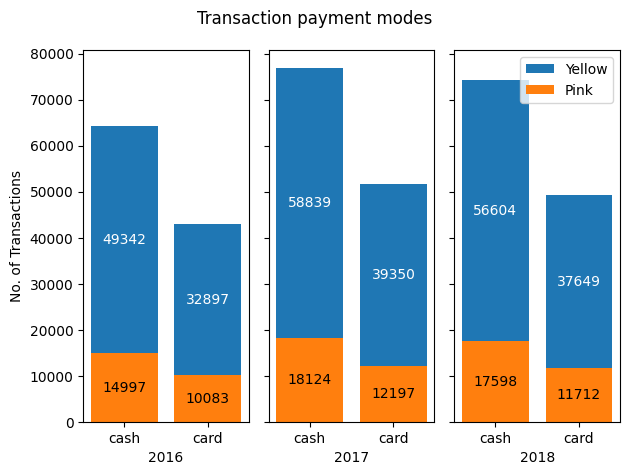

In [37]:
# might be better to swap pink 
labels=['cash', 'card']

fig, ax = plt.subplots(1,3, sharey=True)

#figures
cash_2016=ax[0].bar(labels, yellow_payments_2016,  bottom=pink_payments_2016, label='Yellow')
card_2016=ax[0].bar(labels, pink_payments_2016,label='Pink')

cash_2017=ax[1].bar(labels, yellow_payments_2017, bottom=pink_payments_2017, label='Yellow')
card_2017=ax[1].bar(labels, pink_payments_2017, label='Pink')

cash_2018=ax[2].bar(labels, yellow_payments_2018, bottom=pink_payments_2018, label='Yellow')
card_2018=ax[2].bar(labels, pink_payments_2018, label='Pink')

#labels
ax[0].bar_label(cash_2016,label_type='center', color='w')
ax[0].bar_label(card_2016,label_type='center')
ax[0].set_xlabel('2016')

ax[1].bar_label(cash_2017,label_type='center', color='w')
ax[1].bar_label(card_2017,label_type='center')
ax[1].set_xlabel('2017')

ax[2].bar_label(cash_2018,label_type='center', color='w')
ax[2].bar_label(card_2018,label_type='center')
ax[2].set_xlabel('2018')
ax[0].set_ylabel('No. of Transactions')

fig.suptitle('Transaction payment modes')
fig.tight_layout()
plt.legend()
plt.show()

__Yellow cab facilitated a higher number of card transactions, catering towards the digital trends towards cashless payments.It also suggests the yellow cab company already has the infrastructure in place to support large volumes of digital infrastructure.__

## Customer retention

__Retention rates are a good way to determine how positive a users interaction with the service is. Higher retention rates suggest good customer service. We define retention as at least 5 repeat purchases over the 2 year period.__

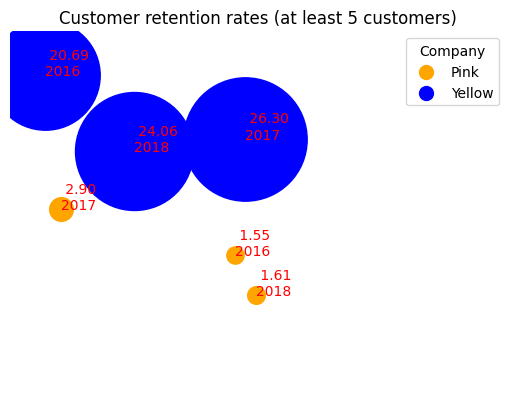

In [65]:
rides_per_customer=df1.join(df4, lsuffix='L', rsuffix='R').groupby(['Customer ID', 'Company', 'Year'])['Transaction IDL'].count() # number of transactions for each user

# implement for loop across each year
years=['2016','2017','2018']

for year in years:
    # pink retention for years
    rides_per_customer_pink=rides_per_customer.filter(like='Pink Cab').filter(like=year)
    at_least_5=rides_per_customer_pink[rides_per_customer_pink>=5]
    # how many customers rode more than 4 times/ number of customers in that year for the pink company
    pink_retention=len(at_least_5)/len(rides_per_customer_pink)*100

    # yellow retention for year
    rides_per_customer_yellow=rides_per_customer.filter(like='Yellow Cab').filter(like=year)
    at_least_5=rides_per_customer_yellow[rides_per_customer_yellow>=5]
    yellow_retention=len(at_least_5)/len(rides_per_customer_yellow)*100

    x_pink=np.random.normal()
    y_pink=np.random.normal()
    x_yellow=np.random.normal()
    y_yellow=np.random.normal()


    plt.scatter(x_pink,y_pink,s=pink_retention*100, color='orange', label=year)
    plt.scatter(x_yellow,y_yellow,s=yellow_retention*300, color='blue', label=year)
    plt.annotate(f'{yellow_retention: .2f}\n{year}', (x_yellow,y_yellow), color='r')
    plt.annotate(f'{pink_retention: .2f}\n{year}', (x_pink,y_pink), color='r')
legend=plt.legend(title='Company', labels=['Pink', 'Yellow'])
legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.title('Customer retention rates (at least 5 customers)')
plt.axis('off')
plt.show()

__Clearly the yellow cab has a far better retention than the pink cab since a greater proportion of customers buy more than 5 times with them.__

## Recommendations

__The two cab companies performed similarly for only two metrics. For the remainder, the Yellow Cab company outperformed the Pink Cab company. Therefore, I recommend to invest in the yellow cab company__